# Рекомендация тарифов

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

<b>План работы</b>

1. Изучение датафрейма с данными клиентов.
2. Разделение данных на тренировочную (60%), валидационную (20%) и тестовую (20%) выборки.
3. Обучение на тренировочной выборке разных моделей для задачи классификации по выбору подходящего тарифа:
    - случайный лес
    - дерево решений
    - логистическая регрессия
   Проверка точности моделей на валидационной выборке.
4. Проверка моделей на тестовой выборке.
5. Проверка моделей на адекватность.


## 1. Изучаю файл

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.dummy import DummyClassifier


data = pd.read_csv('C:/datasets/6/users_behavior.csv')

data.head(20)

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
5,58.0,344.56,21.0,15823.37,0
6,57.0,431.64,20.0,3738.90,1
7,15.0,132.40,6.0,21911.60,0
8,7.0,43.39,3.0,2538.67,1
9,90.0,665.41,38.0,17358.61,0


In [2]:
data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


<b>Промежуточный вывод и комментарий по поводу данных:</b>

В данных отсутствуют пропуски, что позволяет сразу перейти к работе с ними. Среди них нет типа object, поэтому все они доступны для вычислительных операций. Все столбцы, кроме is_ultra, - количественные признаки, а is_ultra - категориальный признак.


## 2. Разбиваю данные на выборки

In [3]:
features = data.drop(['is_ultra'], axis=1)
target = data['is_ultra']

In [4]:
# Выделяю валидационную выборку

features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.20, random_state=12345)

In [5]:
# Выделяю тестовую выборку из оставшихся тренировочных данных

features_train, features_test, target_train, target_test = train_test_split(
    features_train, target_train, test_size=0.25, random_state=12345)

## 3. Обучаю и исследую модели

In [7]:
# Применяю модель "случайный лес" и смотрю на её показатели

best_est = 0
best_model = None
best_result = 0
for est in range(1, 100):
    model = RandomForestClassifier(random_state=12345, n_estimators=est) 
    model.fit(features_train, target_train)
    result = model.score(features_valid, target_valid)
    if result > best_result:
        best_model = model
        best_result = result
        best_est = est

print('Лучшая accuracy:', best_result)
print('Оптимальное число деревьев:', best_est)

Лучшая accuracy: 0.7931570762052877
Оптимальное число деревьев: 84


In [8]:
# Применяю модель "логистическая регрессия" и смотрю на её показатели

model_2_1 = LogisticRegression(random_state=12345, max_iter=1000, solver='lbfgs') 
model_2_1.fit(features_train, target_train)
result = model_2_1.score(features_valid, target_valid)

print('Лучшая accuracy:', result)

Лучшая accuracy: 0.7589424572317263


In [9]:
# Применяю модель "дерево решений" и смотрю на её показатели

best_depth = 0
best_model = None
best_result = 0
for depth in range(1, 100):
    model_3 = DecisionTreeClassifier(random_state=12345, max_depth=depth) 
    model_3.fit(features_train, target_train)
    result = model_3.score(features_valid, target_valid)
    if result > best_result:
        best_model = model_3
        best_result = result
        best_depth = depth

print('Лучшая accuracy:', best_result)
print('Оптимальная глубина дерева:', best_depth)

Лучшая accuracy: 0.7884914463452566
Оптимальная глубина дерева: 5


Самой точной моделью является <b>случайный лес</b>. Его accuracy  составляет 0.79. при числе деревьев 84.

На втором месте по точности <b>дерево решений</b> с accuracy 0.78 при глубине дерева 5.

На третьем месте <b>логистическая регрессия</b> с accuracy 0.75.

## 4. Проверяю модель на тестовой выборке

In [10]:
# Проверяю модель с самой высокой точностью на тестовой выборке

model = RandomForestClassifier(random_state=12345, n_estimators=84) 
model.fit(features_train, target_train)

score_model = model.score(features_test, target_test)

print('Точность RandomForestClassifier на тестовой выборке:', score_model)

Точность RandomForestClassifier на тестовой выборке: 0.7978227060653188


Accuracy модели RandomForestClassifier на тестовой выборке составляет <b>0.7978227060653188</b>

## 5. Проверяю модели на адекватность

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


264


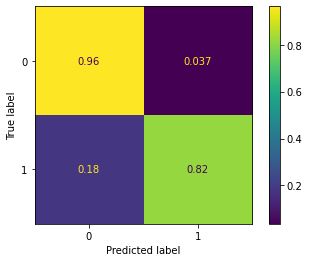

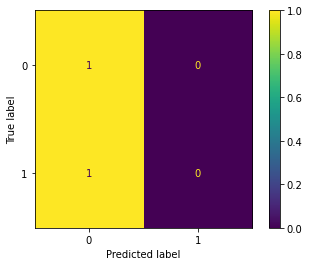

In [34]:
predictions_RandomForestClassifier = model.predict(features)

error_count_RandomForestClassifier = 0

for index in range(len(predictions_RandomForestClassifier)):
    if predictions_RandomForestClassifier[index] != target[index]:
        error_count_RandomForestClassifier += 1
        
print(error_count_RandomForestClassifier)

plot_confusion_matrix(estimator=model, X=features, y_true=target, normalize='true')


# Создаю и обучаю модель DummyClassifier, чтобы сравнить матрицы ошибок
model_dummy = DummyClassifier(random_state=12345)
model_dummy.fit(features_train, target_train)

plot_confusion_matrix(estimator=model_dummy, X=features, y_true=target, normalize='true')

358


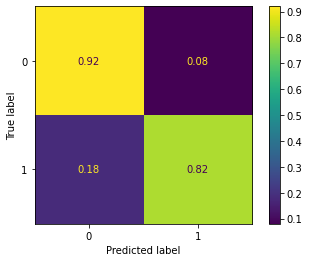

In [32]:
predictions_DecisionTreeClassifier = model_3.predict(features)

error_count_DecisionTreeClassifier = 0

for index in range(len(predictions_RandomForestClassifier)):
    if predictions_DecisionTreeClassifier[index] != target[index]:
        error_count_DecisionTreeClassifier += 1
        
print(error_count_DecisionTreeClassifier)
plot_confusion_matrix(estimator=model_3, X=features, y_true=target, normalize='true')

811


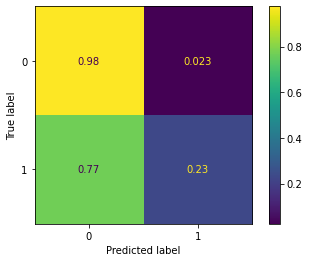

In [33]:
predictions_LogisticRegression = model_2_1.predict(features)

error_count_LogisticRegression = 0

for index in range(len(predictions_RandomForestClassifier)):
    if predictions_LogisticRegression[index] != target[index]:
        error_count_LogisticRegression += 1
        
print(error_count_LogisticRegression)
plot_confusion_matrix(estimator=model_2_1, X=features, y_true=target, normalize='true')

При проверке трёх моделей на целом датасете 
 
 - Модель RandomForestClassifier допустила 264 ошибки
 - Модель DecisionTreeClassifier допустила 358 ошибок
 - Модель LogisticRegression допустила 811 ошибок
 
В данных намного больше отрицательных вариантов, поэтому DummyClassifier, в отличие от остаальных моделей, предсказал все варианты как отрицательные. Из-за этого перевеса модель LogisticRegression допустила схожую ошибку но в меньших масштабах (здесь тоже наблюдается значительный перевес в пользу отрицательного варианта). И DecisionTreeClassifier, и RandomForestClassifier научись предсказывать отрицательный вариант лучше, чем положительный.

## 6. Вывод

<b>Были выполнены следующие шаги:</b>

1. Изучение датафрейма с данными клиентов.
2. Разделение данных на тренировочную (60%), валидационную (20%) и тестовую (20%) выборки.
3. Обучение на тренировочной выборке разных моделей для задачи классификации по выбору подходящего тарифа:
    - Самой точной моделью является случайный лес. Его accuracy составляет 0.79. при числе деревьев 84.

    - На втором месте по точности дерево решений с accuracy 0.78 при глубине дерева 5.

    - На третьем месте логистическая регрессия с accuracy 0.75.


4. Проверка моделей на тестовой выборке.

    Accuracy самой точной модели RandomForestClassifier на тестовой выборке составила 0.7978227060653188


5. Проверка моделей на адекватность.

    При проверке трёх моделей на целом датасете

    - Модель RandomForestClassifier допустила 264 ошибки
    - Модель DecisionTreeClassifier допустила 358 ошибок
    - Модель LogisticRegression допустила 811 ошибок
    
    В данных намного больше отрицательных вариантов, поэтому DummyClassifier, в отличие от остаальных моделей, предсказал все варианты как отрицательные. Из-за этого перевеса модель LogisticRegression допустила схожую ошибку но в меньших масштабах (здесь тоже наблюдается значительный перевес в пользу отрицательного варианта). И DecisionTreeClassifier, и RandomForestClassifier научись предсказывать отрицательный вариант лучше, чем положительный.